# Importing libraries

In [76]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

print(matplotlib.__version__)

3.10.0


# Importing data

In [77]:
path = r'C:\Users\thoma\OneDrive\Dokumente\data analytics\Imm_Ach 6 DA Project 6\Snow Crab Ach 6'

In [78]:
path

'C:\\Users\\thoma\\OneDrive\\Dokumente\\data analytics\\Imm_Ach 6 DA Project 6\\Snow Crab Ach 6'

In [79]:
# Importing dataframe
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared data', 'Cleaned Snow Crab.csv'), index_col = False)

In [80]:
df.shape

(17924, 12)

In [81]:
df.head()

,Unnamed: 0,id,latitude,longitude,year,name,sex,bottom_depth,surface_temperature,bottom_temperature,haul,catch number/square nautical mile
0,0,147038,57.00000,-166.45000,1975,snow crab,male,71,9.1,1.1,117,40356.0
1,1,147037,57.00000,-167.08333,1975,snow crab,male,71,8.7,1.4,118,68691.0
2,2,147036,57.00000,-167.68333,1975,snow crab,male,75,8.8,1.6,139,119748.0
3,3,147035,56.66667,-172.56667,1975,snow crab,male,132,6.1,2.5,89,7882.0
4,4,147034,56.66667,-171.96667,1975,snow crab,male,123,5.7,2.1,90,11258.0


# Creating a correlation matrix

In [82]:
# Dropping columns
df_subset = df.drop(columns=["id", "haul", "Unnamed: 0", "name", "sex", "latitude", "longitude"])

In [83]:
df_subset.columns

Index(['year', 'bottom_depth', 'surface_temperature', 'bottom_temperature',
       'catch number/square nautical mile'],
      dtype='object')

In [84]:
df_subset.head()

,year,bottom_depth,surface_temperature,bottom_temperature,catch number/square nautical mile
0,1975,71,9.1,1.1,40356.0
1,1975,71,8.7,1.4,68691.0
2,1975,75,8.8,1.6,119748.0
3,1975,132,6.1,2.5,7882.0
4,1975,123,5.7,2.1,11258.0


In [85]:
df_subset.dtypes

year                                   int64
bottom_depth                           int64
surface_temperature                  float64
bottom_temperature                   float64
catch number/square nautical mile    float64
dtype: object

In [86]:
# Creating a correlation matrix
df_subset.corr()

,year,bottom_depth,surface_temperature,bottom_temperature,catch number/square nautical mile
year,1.000000,0.016973,0.066240,-0.118611,-0.025016
bottom_depth,0.016973,1.000000,0.417346,0.275640,-0.070519
surface_temperature,0.066240,0.417346,1.000000,0.255520,0.080904
bottom_temperature,-0.118611,0.275640,0.255520,1.000000,-0.130434
catch number/square nautical mile,-0.025016,-0.070519,0.080904,-0.130434,1.000000


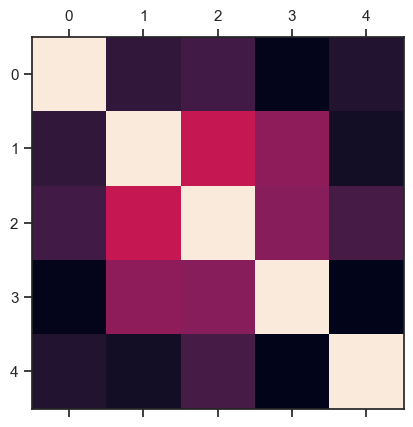

In [87]:
# Ad question 3.
# Creating a correlation heatmap using matplotlib

plt.matshow(df_subset.corr())
plt.show()

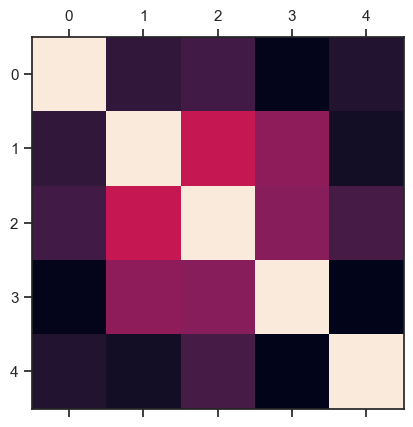

In [88]:
# Saving figure
plt.matshow(df_subset.corr())
plt.savefig("corr_heatmap.png")

In [89]:
# Current directory
cwd = os.getcwd()
cwd

'C:\\Users\\thoma\\OneDrive\\Dokumente\\data analytics\\Imm_Ach 6 DA Project 6'

Text(0.5, 1.0, 'Correlation Matrix')

<Figure size 800x800 with 0 Axes>

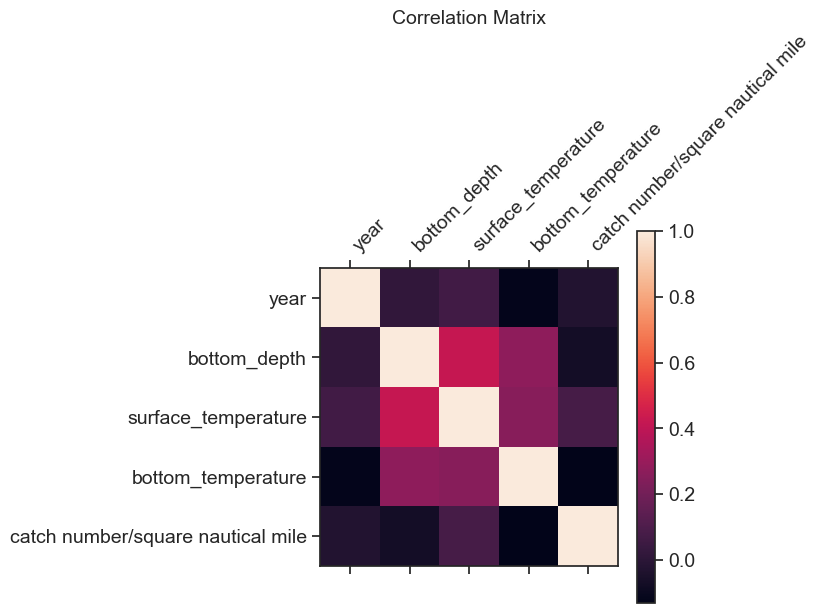

In [90]:
# Adding labels, a legend and changing the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_subset.corr()) # type of plot
plt.xticks(range(df_subset.shape[1]), df_subset.columns, fontsize=14, rotation=45, ha="left") # x axis labels
plt.yticks(range(df_subset.shape[1]), df_subset.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

# The color legend on the right is indicating the strength of the relationship;
# There may be a strong positive relationship between bottom depth and surface temperature.
# And there may be a weak negative relationship between the catch number and bottom temperature. 
# But there's still a need to cross reference and estimate or guess the strength of these relationships.

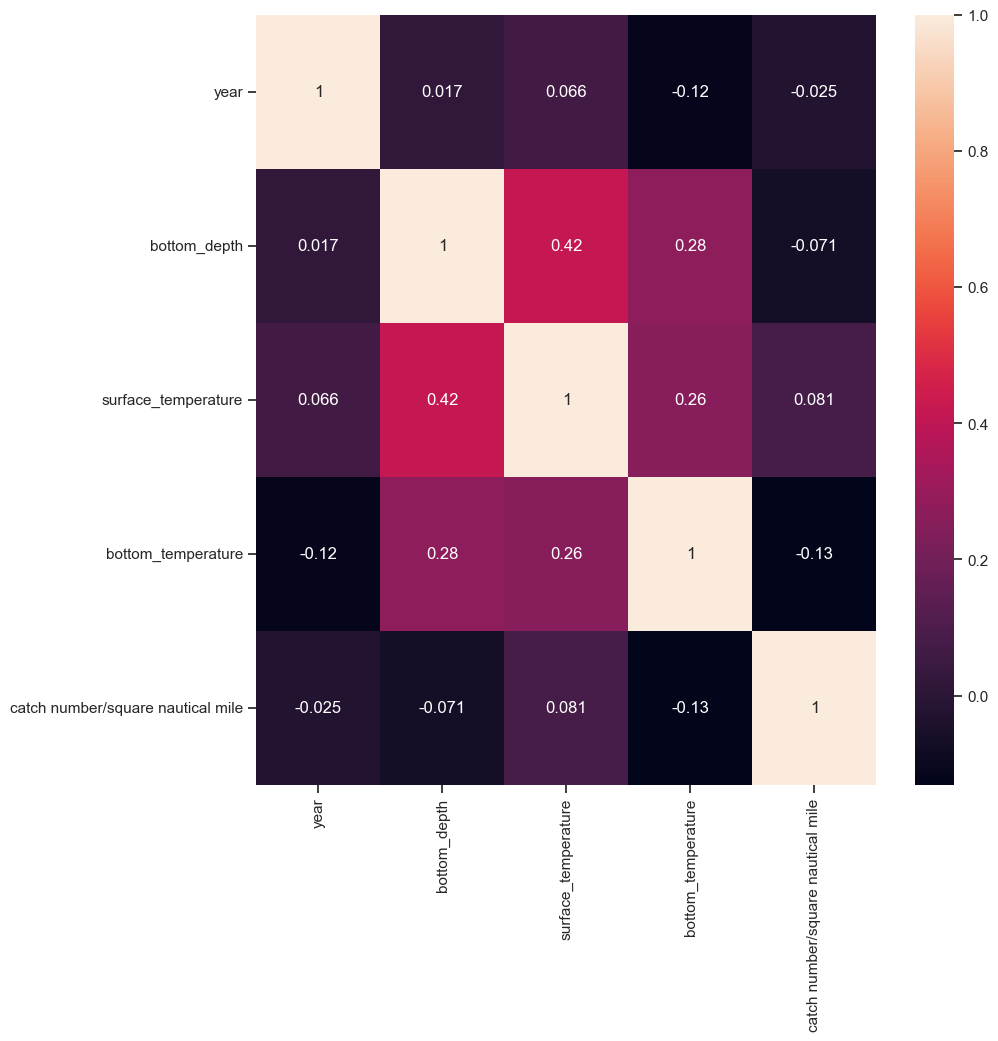

In [91]:
# Creating a correlation heatmap using seaborn
# Creating a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Creating the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_subset.corr(), annot = True, ax = ax)

In [92]:
corr.figure
corr.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Corr Heatmap.png'))

# Using seaborn the exact correlation coefficients are placed within the cells;
# There's a weak positive relationship between bottom depth and surface temperature with a correlation coefficient of 0.42.
# Catch number/bottom temperature are showing no weak relationship with a correlation coefficient of -0.13.

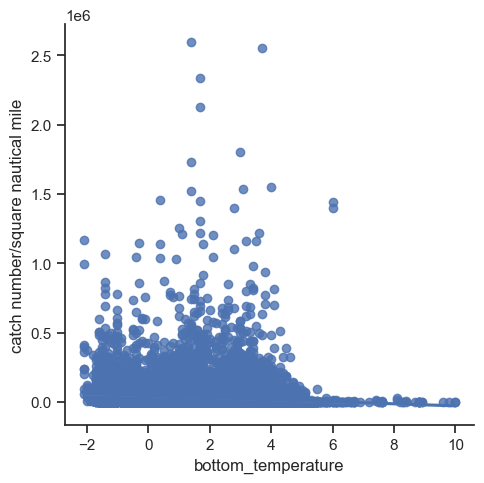

In [93]:
# Ad 4. Creating scatterplot(s)
sns.lmplot(x = 'bottom_temperature', y = 'catch number/square nautical mile', data = df_subset)

# There seem to be increased catch numbers within a bottom temperature range of -2 and about 5.

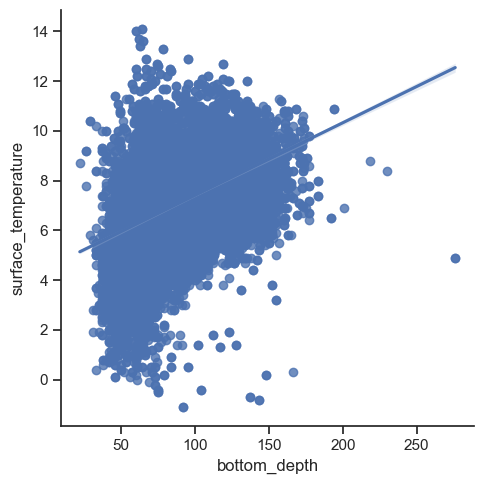

In [94]:
sns.lmplot(x = 'bottom_depth', y = 'surface_temperature', data = df_subset)

# There's a positive linear trend between bottom depth and surface temperature with most observations below 200.

In [95]:
# Ad question 5.
# Creating a pair plot 

df_subset.columns

Index(['year', 'bottom_depth', 'surface_temperature', 'bottom_temperature',
       'catch number/square nautical mile'],
      dtype='object')

In [96]:
# Keeping only relevant variables for the pair plot

df_subset2 = df_subset[['year', 'bottom_depth', 'surface_temperature', 'bottom_temperature', 'catch number/square nautical mile']]

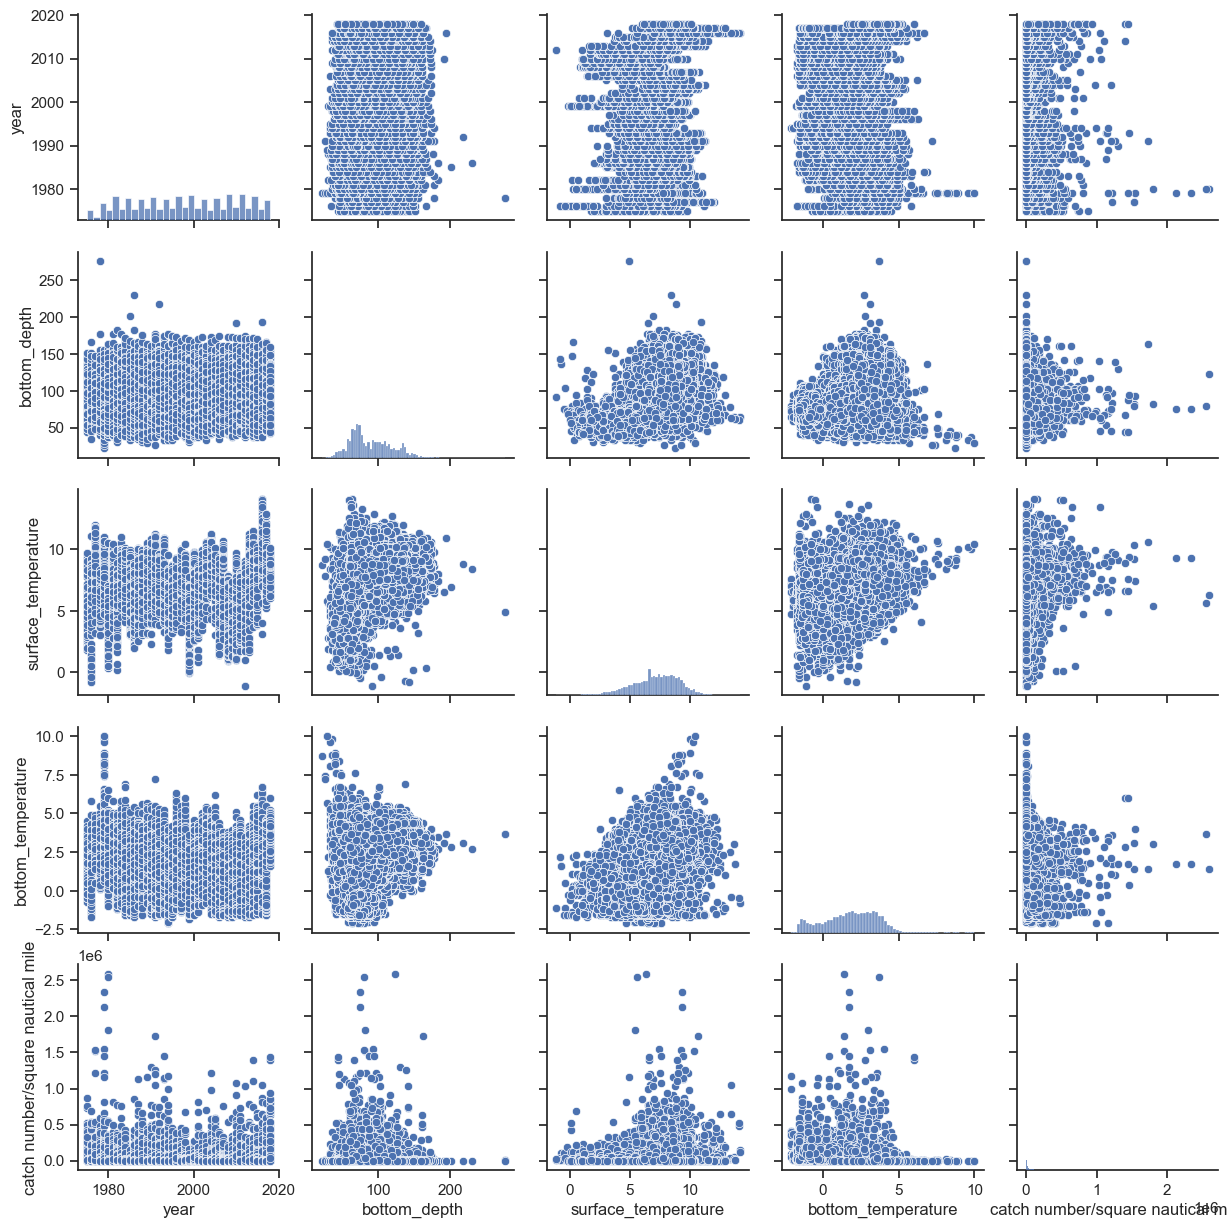

In [97]:
g = sns.pairplot(df_subset2)

In [98]:
g.figure
g.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Pair Plot.png'))

# There seems to be an optimal range for bottom depth, bottom and surface temperature.

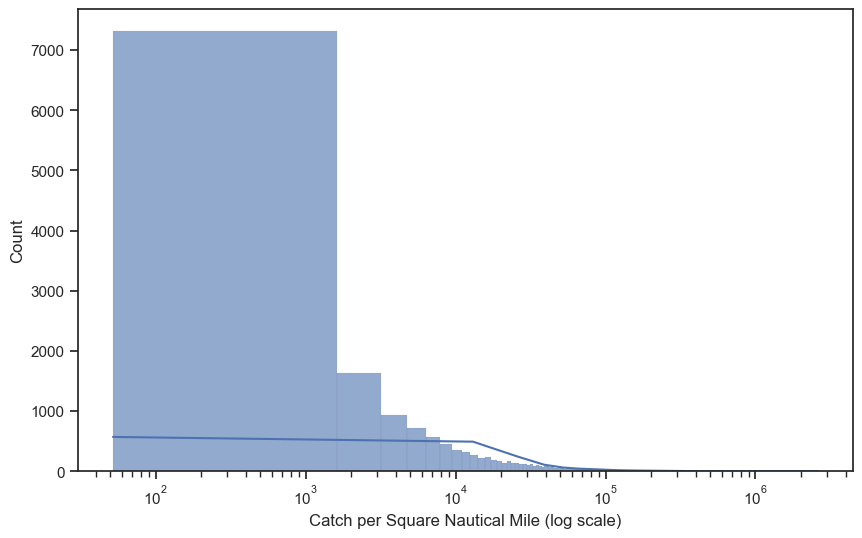

In [99]:
# Ad question 6.
# Creating a categorical plot

plt.figure(figsize=(10,6))
sns.histplot(df_subset2['catch number/square nautical mile'], bins='fd', kde=True, edgecolor="black", alpha=0.6)
plt.xscale("log")
plt.xlabel("Catch per Square Nautical Mile (log scale)")
plt.show()

# The x-axis has been changed to logarithmic due to the highly skewed data distribution, with many small values and a few large.

In [100]:
df_subset['catch number/square nautical mile'].value_counts()

catch number/square nautical mile
69.0        94
72.0        89
74.0        84
71.0        80
70.0        79
            ..
6862.0       1
13463.0      1
9488.0       1
151010.0     1
35198.0      1
Name: count, Length: 10642, dtype: int64

In [101]:
df_subset['catch number/square nautical mile'].describe()

count    1.792400e+04
mean     3.208863e+04
std      9.789823e+04
min      5.200000e+01
25%      4.827500e+02
50%      3.214000e+03
75%      2.095875e+04
max      2.592070e+06
Name: catch number/square nautical mile, dtype: float64

In [102]:
# Deriving a new variable 'Catch number category'

df_subset.loc[df_subset['catch number/square nautical mile'] < 3000, 'catch category'] = 'Low catch'

In [103]:
df_subset.loc[(df_subset['catch number/square nautical mile'] >= 3000) & (df_subset['catch number/square nautical mile'] < 100000), 'catch category'] = 'Medium catch'

In [104]:
df_subset.loc[df_subset['catch number/square nautical mile'] > 100000, 'catch category'] = 'High catch'

In [105]:
df_subset['catch category'].value_counts(dropna = False)

catch category
Low catch       8829
Medium catch    7621
High catch      1474
Name: count, dtype: int64

In [106]:
df_subset.columns

Index(['year', 'bottom_depth', 'surface_temperature', 'bottom_temperature',
       'catch number/square nautical mile', 'catch category'],
      dtype='object')

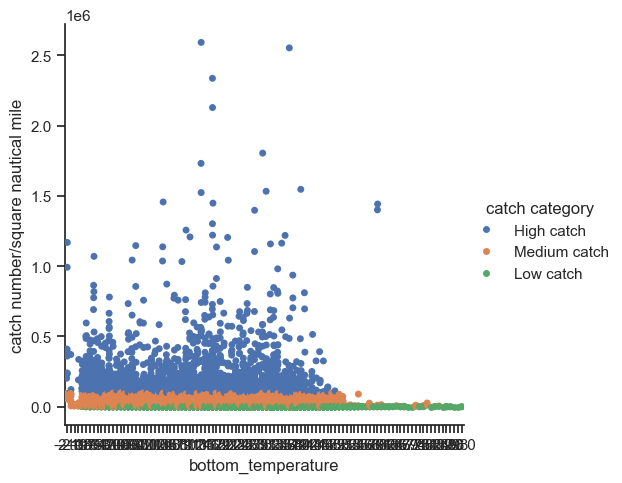

In [107]:
# Creating a categorical plot in seaborn using the catch categories created above

sns.set(style="ticks")
G = sns.catplot(x="bottom_temperature", y="catch number/square nautical mile", hue="catch category", data=df_subset)

# There seems to be greater variance between 'High catch' observations

In [108]:
G.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Bottom Temp vs Catch Number.png'))

# Clarifying question:

# 1. Why do catch number values vary so much?
# A couple of factors (bottom depth, surface and bottom temperature) appear to play a role and have influence on catch numbers.

# New questions:

# How is the regional distribution of catch numbers?
# Did catch numbers change from 1975 to 2018?

# Hypothesis 1: There's no significant regional difference in mean and maximum catch numbers.
# Hypothesis 2: There's no significant change in mean and maximum catch numbers between 1975 - 2018.